In [ ]:
import jax
import sys
import os
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np



jax.config.update("jax_enable_x64", True)

In [11]:
current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)

if project_root not in sys.path:
    sys.path.append(project_root)
from src.core.derivatives import get_calculus_engine
from src.optimizers.second_order import NewtonOptimizer
from src.core.functional import rosenbrock
from src.optimizers.first_order import VanillaGradientDescent

In [12]:
def run_failure_experiment():
    grad_fn, _ = get_calculus_engine(rosenbrock)
    x_init = jnp.array([-1.2, 1.0])
    
    learning_rates = [0.0005, 0.002, 0.005]
    histories = {}

    for lr in learning_rates:
        opt = VanillaGradientDescent(learning_rate=lr)
        x = x_init
        path = [x]
        for _ in range(500):
            x = opt.step(x, grad_fn, None)
            path.append(x)
        histories[f"LR={lr}"] = np.array(path)
    
    return histories

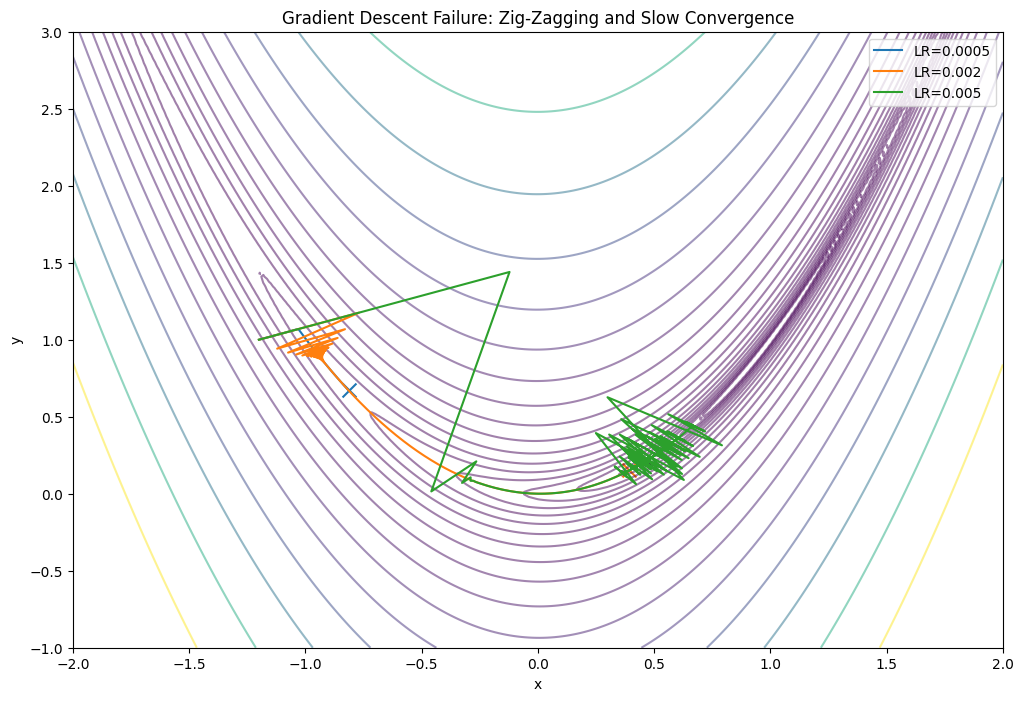

In [13]:
def plot_failure(histories):
    x_range = np.linspace(-2.0, 2.0, 250)
    y_range = np.linspace(-1.0, 3.0, 250)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.array([[rosenbrock(jnp.array([xi, yi])) for xi in x_range] for yi in y_range])

    plt.figure(figsize=(12, 8))
    plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis', alpha=0.5)
    
    for label, path in histories.items():
        plt.plot(path[:, 0], path[:, 1], label=label, lw=1.5)
        plt.scatter(path[-1, 0], path[-1, 1], marker='x', s=100)

    plt.title("Gradient Descent Failure: Zig-Zagging and Slow Convergence")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

histories = run_failure_experiment()
plot_failure(histories)

In [14]:
for label, path in histories.items():
    final_val = rosenbrock(path[-1])
    dist_to_min = np.linalg.norm(path[-1] - np.array([1.0, 1.0]))
    print(f"{label} | Final f(x): {final_val:.6f} | Distance to Min: {dist_to_min:.6f}")

LR=0.0005 | Final f(x): 3.297635 | Distance to Min: 1.843744
LR=0.002 | Final f(x): 0.369289 | Distance to Min: 1.043237
LR=0.005 | Final f(x): 0.308682 | Distance to Min: 0.946269
